In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth

In [5]:
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('EX-1').sheet1
data = worksheet.get_all_values()
dataset1 = pd.DataFrame(data[1:], columns=data[0])

In [7]:
dataset1 = dataset1.astype({'x':'float'})
dataset1 = dataset1.astype({'y':'float'})
dataset1.head()
X = dataset1[['x']].values
y = dataset1[['y']].values

In [8]:
dataset1

,x,y
0,10.0,35.0
1,20.0,65.0
2,30.0,95.0
3,40.0,125.0
4,50.0,155.0
5,60.0,185.0
6,70.0,215.0
7,80.0,245.0
8,90.0,275.0


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train1 = Scaler.transform(X_train)

In [11]:
ai_brain = Sequential([Dense(units=3,input_shape=[1]), Dense(units=3), Dense(units=1)])

In [12]:
ai_brain.compile(optimizer="rmsprop", loss="mae")

In [13]:
ai_brain.fit(X_train1, y_train, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 584ms/step - loss: 129.9913
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 129.9774
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 129.9674
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 129.9589
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 129.9514
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 129.9445
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 129.9380
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 129.9317
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 129.9258
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 129.9200
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 129.9144
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 129.9088
Epoch 13/2000


In [14]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

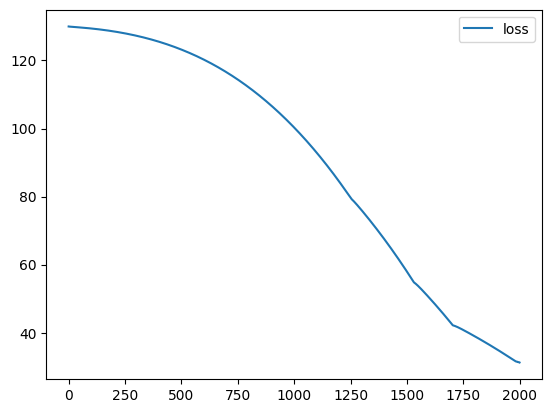

In [15]:
loss_df.plot()

In [16]:
X_test1 = Scaler.transform(X_test)

In [17]:
ai_brain.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 130ms/step - loss: 33.6835


33.68345642089844

In [18]:
X_n1 = [[30]]


In [19]:
X_n1_1 = Scaler.transform(X_n1)

In [20]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 97ms/step


array([[123.742065]], dtype=float32)